In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()


Saving e85ce3aeeba75bcba93416044855ad4073e80e3dceda5735bd9046467e7bc88c.xlsx to e85ce3aeeba75bcba93416044855ad4073e80e3dceda5735bd9046467e7bc88c.xlsx


In [ ]:
FILE_NAME = list(uploaded.keys())[0]

raw = pd.read_excel(FILE_NAME, header=None)

header_row = None
for i in range(min(50, len(raw))):
    row_text = " ".join(raw.iloc[i].astype(str).tolist()).lower()
    if "provinsi" in row_text and ("kab" in row_text or "kota" in row_text):
        header_row = i
        break

print("Header row ketemu di:", header_row)

df = pd.read_excel(FILE_NAME, header=header_row)
df.head()


Header row ketemu di: 2


,No,Kode Kemdagri,Kode BPS,Provinsi,Kabupaten/Kota,Jumlah
0,1,1101,1103,Aceh,Kab. Aceh Selatan,16
1,2,1102,1104,Aceh,Kab. Aceh Tenggara,23
2,3,1103,1105,Aceh,Kab. Aceh Timur,2
3,4,1104,1106,Aceh,Kab. Aceh Tengah,5
4,5,1105,1107,Aceh,Kab. Aceh Barat,9


In [ ]:
# Rapihin nama kolom
df.columns = (
    df.columns.astype(str)
    .str.strip()
    .str.replace("\n", " ", regex=False)
    .str.replace(r"\s+", " ", regex=True)
)

# Mapping otomatis kolom penting
rename_map = {}
for c in df.columns:
    cl = c.lower()
    if "provinsi" in cl:
        rename_map[c] = "Provinsi"
    elif "kab" in cl or "kota" in cl:
        rename_map[c] = "Kabupaten/Kota"
    elif "jumlah" in cl:
        rename_map[c] = "Jumlah"

df = df.rename(columns=rename_map)

# Ambil kolom inti
df = df[["Provinsi", "Kabupaten/Kota", "Jumlah"]].copy()

# Bersihin data
df = df.dropna(subset=["Provinsi", "Kabupaten/Kota", "Jumlah"])

df["Jumlah"] = (
    df["Jumlah"].astype(str)
    .str.replace(".", "", regex=False)
    .str.replace(",", "", regex=False)
)
df["Jumlah"] = pd.to_numeric(df["Jumlah"], errors="coerce")
df = df.dropna(subset=["Jumlah"])
df["Jumlah"] = df["Jumlah"].astype(int)

df.head()


,Provinsi,Kabupaten/Kota,Jumlah
0,Aceh,Kab. Aceh Selatan,16
1,Aceh,Kab. Aceh Tenggara,23
2,Aceh,Kab. Aceh Timur,2
3,Aceh,Kab. Aceh Tengah,5
4,Aceh,Kab. Aceh Barat,9


In [ ]:
from google.colab import files

# Total nasional
total_nasional = int(df["Jumlah"].sum())
jumlah_provinsi = df["Provinsi"].nunique()
jumlah_kabkota = df["Kabupaten/Kota"].nunique()

print("Total nasional putus sekolah SMA:", total_nasional)
print("Jumlah provinsi:", jumlah_provinsi)
print("Jumlah kab/kota:", jumlah_kabkota)

# Rekap per provinsi
prov = (df.groupby("Provinsi", as_index=False)["Jumlah"]
          .sum()
          .sort_values("Jumlah", ascending=False))

# Top 10 kab/kota
top_kab = (df.sort_values("Jumlah", ascending=False)
             .head(10)[["Provinsi", "Kabupaten/Kota", "Jumlah"]])

prov.head(10), top_kab


Total nasional putus sekolah SMA: 10075
Jumlah provinsi: 34
Jumlah kab/kota: 514


(               Provinsi  Jumlah
 33       Sumatera Utara    1263
 27     Sulawesi Selatan     924
 21  Nusa Tenggara Barat     919
 10           Jawa Timur     842
 8            Jawa Barat     688
 22  Nusa Tenggara Timur     596
 23                Papua     402
 32     Sumatera Selatan     397
 2                Banten     342
 5        D.K.I. Jakarta     337,
                 Provinsi      Kabupaten/Kota  Jumlah
 284  Nusa Tenggara Barat   Kab. Lombok Timur     305
 159       D.K.I. Jakarta  Kota Jakarta Timur     229
 36        Sumatera Utara   Kab. Nias Selatan     181
 48        Sumatera Utara          Kota Medan     176
 414     Sulawesi Selatan           Kab. Luwu     159
 419     Sulawesi Selatan       Kota Makassar     151
 29        Sumatera Utara   Kab. Deli Serdang     141
 268               Banten         Kab. Serang     137
 289  Nusa Tenggara Barat   Kab. Lombok Utara     133
 282  Nusa Tenggara Barat   Kab. Lombok Barat     131)

In [ ]:
prov.to_csv("rekap_putus_sekolah_SMA_per_provinsi_2022_2023.csv", index=False)
top_kab.to_csv("top10_putus_sekolah_SMA_kabkota_2022_2023.csv", index=False)

# summary untuk card dashboard
summary = pd.DataFrame({
    "metrik": ["Total Nasional", "Jumlah Provinsi", "Jumlah Kab/Kota"],
    "nilai": [total_nasional, jumlah_provinsi, jumlah_kabkota]
})
summary.to_csv("summary_putus_sekolah_SMA_2022_2023.csv", index=False)

files.download("rekap_putus_sekolah_SMA_per_provinsi_2022_2023.csv")
files.download("top10_putus_sekolah_SMA_kabkota_2022_2023.csv")
files.download("summary_putus_sekolah_SMA_2022_2023.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

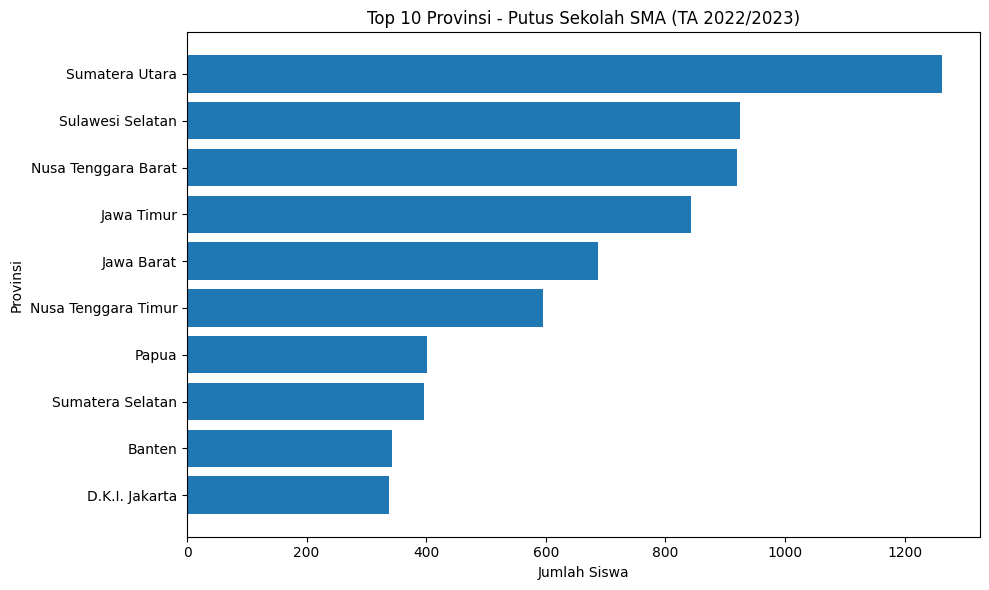

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
top_prov = prov.head(10).copy()
top_prov = top_prov.sort_values("Jumlah", ascending=True)

plt.figure(figsize=(10,6))
plt.barh(top_prov["Provinsi"], top_prov["Jumlah"])
plt.title("Top 10 Provinsi - Putus Sekolah SMA (TA 2022/2023)")
plt.xlabel("Jumlah Siswa")
plt.ylabel("Provinsi")
plt.tight_layout()
plt.savefig("top10_prov_putus_sekolah_SMA_2022_2023.png", dpi=200)
plt.show()

files.download("top10_prov_putus_sekolah_SMA_2022_2023.png")


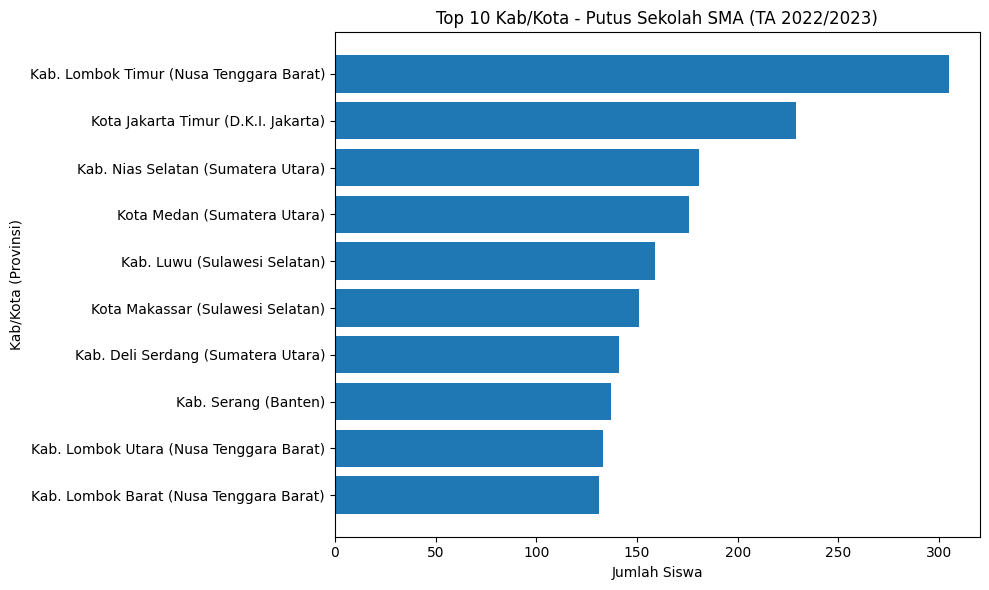

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
tmp = top_kab.copy()
tmp["Label"] = tmp["Kabupaten/Kota"] + " (" + tmp["Provinsi"] + ")"
tmp = tmp.sort_values("Jumlah", ascending=True)

plt.figure(figsize=(10,6))
plt.barh(tmp["Label"], tmp["Jumlah"])
plt.title("Top 10 Kab/Kota - Putus Sekolah SMA (TA 2022/2023)")
plt.xlabel("Jumlah Siswa")
plt.ylabel("Kab/Kota (Provinsi)")
plt.tight_layout()
plt.savefig("top10_kabkota_putus_sekolah_SMA_2022_2023.png", dpi=200)
plt.show()

files.download("top10_kabkota_putus_sekolah_SMA_2022_2023.png")


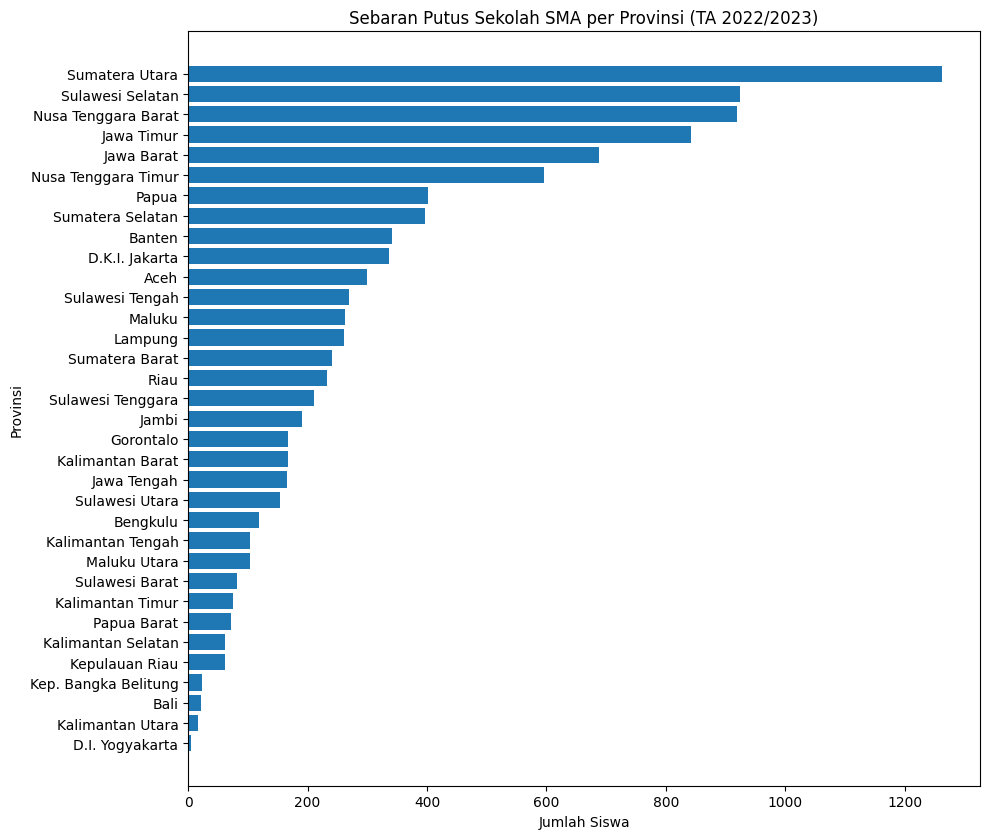

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(10, max(6, len(prov)*0.25)))
prov_sorted = prov.sort_values("Jumlah", ascending=True)

plt.barh(prov_sorted["Provinsi"], prov_sorted["Jumlah"])
plt.title("Sebaran Putus Sekolah SMA per Provinsi (TA 2022/2023)")
plt.xlabel("Jumlah Siswa")
plt.ylabel("Provinsi")
plt.tight_layout()
plt.savefig("sebaran_prov_putus_sekolah_SMA_2022_2023.png", dpi=200)
plt.show()

files.download("sebaran_prov_putus_sekolah_SMA_2022_2023.png")
